In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('airlines_delay.csv')

In [3]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [5]:
data.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [6]:
data.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

In [7]:
data.Airline.value_counts()

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64

In [8]:
data.AirportFrom.value_counts()

AirportFrom
ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["Airline","AirportFrom","AirportTo"]]=oe.fit_transform(data[["Airline","AirportFrom","AirportTo"]])

In [10]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5.0,16.0,129.0,1,0
1,6948.0,360.0,146.0,12.0,65.0,208.0,4,0
2,1247.0,1170.0,143.0,3.0,35.0,60.0,3,0
3,31.0,1410.0,344.0,14.0,203.0,217.0,6,0
4,563.0,692.0,98.0,8.0,32.0,16.0,4,0


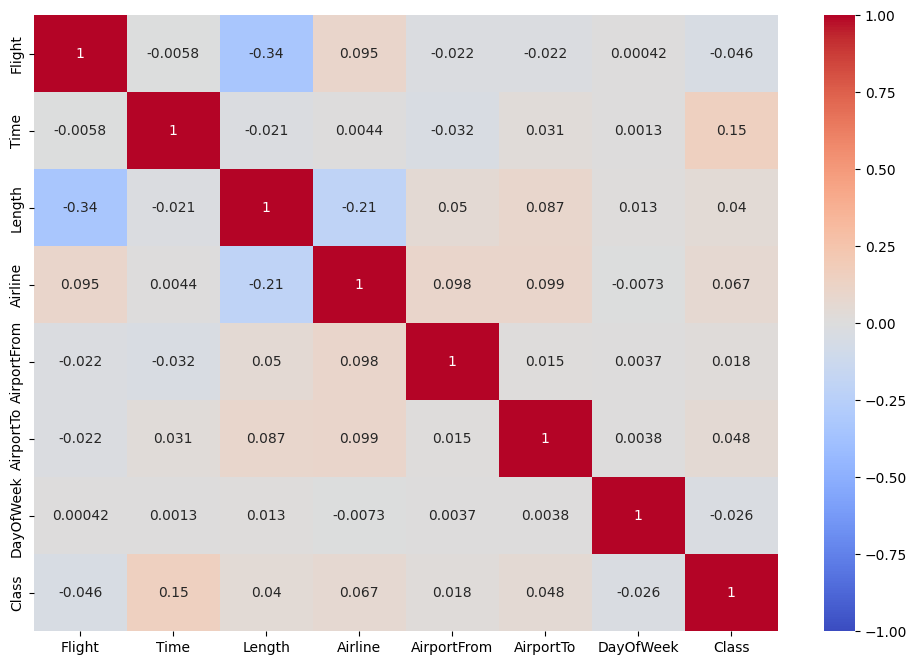

In [11]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [13]:
# Defining independent and dependent features
X = data.drop(columns=["Class"])
y = data['Class']

In [14]:
X.shape

(539382, 7)

In [15]:
y.shape

(539382,)

In [16]:
y.value_counts()

Class
0    299118
1    240264
Name: count, dtype: int64

In [17]:
#Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [19]:
rf = RandomForestClassifier(random_state=42)

In [20]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


In [ ]:
print("Best Hyperparameters:\n", grid_search.best_params_)

In [ ]:
# Train Random Forest with Best Parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = best_rf.predict(X_test)

In [ ]:
# Evaluation Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

In [ ]:
print(importances)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()